In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Случайная величина, моделирующая распределение Bi(5, 0.5)

In [4]:
def Y():
    #ans = 0;
    
    tmp = np.random.random(size = 5)
    for i in range(5):
        # Непрерывность слева
        if tmp[i] >= 0.5:
            tmp[i] = 1;
        else:
            tmp[i] = 0;
    
    return tmp.sum()

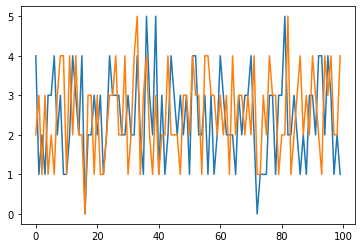

In [13]:
a = np.zeros((100))
for i in range(100):
    a[i] = Y()

b = np.random.binomial(5, 0.5, (100))
plt.plot(a)
plt.plot(b)

In [21]:
own = np.zeros((6))
for i in range(100):
    own[int(a[i])] += 1

own /= 100

binom = np.zeros((6))
for i in range(100):
    binom[int(b[i])] += 1

binom /= 100

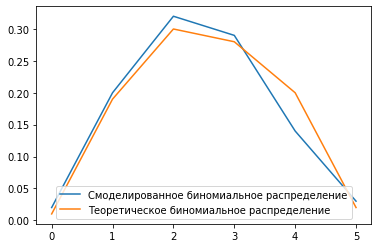

In [30]:
plt.plot(own)
plt.plot(binom)
plt.legend(["Смоделированное биномиальное распределение", 
            "Теоретическое биномиальное распределение"])

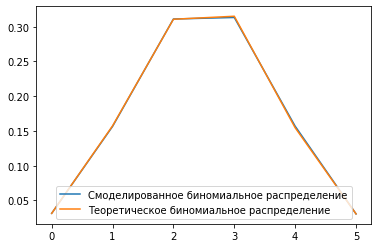

In [53]:
a1 = np.zeros((100000))
for i in range(100000):
    a1[i] = Y()

b1 = np.random.binomial(5, 0.5, (100000))

own1 = np.zeros((6))
for i in range(100000):
    own1[int(a1[i])] += 1

own1 /= 100000

binom1 = np.zeros((6))
for i in range(100000):
    binom1[int(b1[i])] += 1

binom1 /= 100000

plt.plot(own1)
plt.plot(binom1)
plt.legend(["Смоделированное биномиальное распределение", 
            "Теоретическое биномиальное распределение"])

## Выборочное среднее и дисперсия

### Выборочное среднее

#### Смоделированная

In [41]:
s = a.sum() / 100
print(s)

2.42


#### Теоретическая

In [42]:
s_bin = b.sum() / 100
print(s_bin)

2.53


In [55]:
s1 = a1.sum() / 100000
print(s1)


s_bin1 = b1.sum() / 100000
print(s_bin1)

2.49967
2.49635


### Дисперсия

#### Смоделированная

In [48]:
s_sqrt = (a*a).sum()/100
disp = s_sqrt - s**2
print(disp)

1.2236000000000002


#### Теоретическая

In [49]:
s_bin_sqrt = (b*b).sum()/100
disp_bin = s_bin_sqrt - s_bin**2
print(disp_bin)

1.2091000000000012


In [56]:
s_sqrt1 = (a1*a1).sum()/100000
disp1 = s_sqrt1 - s1**2
print(disp1)


s_bin_sqrt1 = (b1*b1).sum()/100000
disp_bin1 = s_bin_sqrt1 - s_bin1**2
print(disp_bin1)

1.2493598910999992
1.2465266775000003


# Задание 2
# Стандартное распределение Коши C(0, 1)

In [4]:
def C():
    return np.tan(np.pi*(np.random.random() - 0.5))

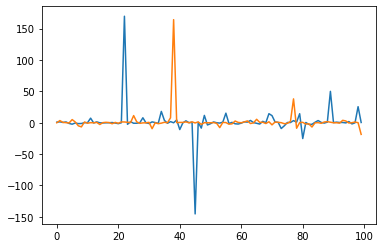

In [68]:
c = np.zeros((100))
for i in range(100):
    c[i] = C()

d_cauch = np.random.standard_cauchy(size = (100))

plt.plot(c)
plt.plot(d_cauch)

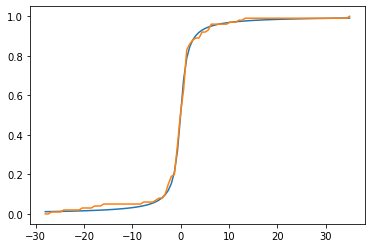

In [9]:
start = int(min(c.min(), d_cauch.min())) - 1
stop = int(max(c.max(), d_cauch.max())) + 1
x = np.linspace(start = start, stop = stop, num = 100)

y_cauchy = lambda x: 1/np.pi * np.arctan(x) + 0.5
def emper(x, c = c):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        for i in range(len(c)):
            if x[j] > c[i]:
                ans[j] += 1
    
    ans = ans/len(ans)
    return ans

#y_emp_c = lambda x: emper(x)
plt.plot(x, y_cauchy(x))
plt.plot(x, emper(x))

### Гистограмма и теоретическая плотность

Для определения числа разрядов используем правило Стерджиса: n = 1+[log2N], где N = 100 или N = 100000

In [33]:
def n(N = 100):
    return int(np.sqrt(N))
    #return 1 + int(np.log2(N))

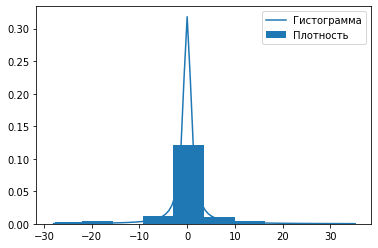

In [61]:
n_c = n()
hist_len = (x.max() - x.min())/(n_c)
mas = np.zeros((n_c+1))

for i in range(n_c):
    mas[i] = x.min() + hist_len*i
mas[n_c] = x.max()
result = np.zeros((n_c))
for i in range(len(c)):
    for j in range(n_c):
        if c[i] <= mas[j+1] and c[i] > mas[j]:
            result[j] += 1

def h(x):
    ans = np.zeros_like(x)
    for i in range(len(x)):
        for j in range(n_c):
            if x[i] <= mas[j+1] and x[i] > mas[j]:
                ans[i] += result[j]
    
    ans /= (hist_len*100)
    return ans
plt.bar(x, h(x))

f = lambda x: 1/np.pi * (1/(x**2 + 1))

plt.plot(x, f(x))
plt.legend(["Гистограмма", "Плотность"])

### Выборочная медиана и теоретическое значение

In [62]:
F_T = lambda x: np.tan(np.pi*(x-0.5))

In [80]:
print("Теоретическое значение: ", F_T(0.5))
print("Выборочная медиана: ", np.sort(c)[49])

Теоретическое значение:  0.0
Выборочная медиана:  0.11324967666931936


# Задание 3
# Использование задачи 8

In [81]:
def R(a = 0, b = 1):
    return a+np.random.random()*(b-a)

In [82]:
def E():
    return 1/5 * (R(-8,-3)+R(-3, -1)+R(-1, 3)+R(3,4)+R(4,8))

[-4.         -3.86868687 -3.73737374 -3.60606061 -3.47474747 -3.34343434
 -3.21212121 -3.08080808 -2.94949495 -2.81818182 -2.68686869 -2.55555556
 -2.42424242 -2.29292929 -2.16161616 -2.03030303 -1.8989899  -1.76767677
 -1.63636364 -1.50505051 -1.37373737 -1.24242424 -1.11111111 -0.97979798
 -0.84848485 -0.71717172 -0.58585859 -0.45454545 -0.32323232 -0.19191919
 -0.06060606  0.07070707  0.2020202   0.33333333  0.46464646  0.5959596
  0.72727273  0.85858586  0.98989899  1.12121212  1.25252525  1.38383838
  1.51515152  1.64646465  1.77777778  1.90909091  2.04040404  2.17171717
  2.3030303   2.43434343  2.56565657  2.6969697   2.82828283  2.95959596
  3.09090909  3.22222222  3.35353535  3.48484848  3.61616162  3.74747475
  3.87878788  4.01010101  4.14141414  4.27272727  4.4040404   4.53535354
  4.66666667  4.7979798   4.92929293  5.06060606  5.19191919  5.32323232
  5.45454545  5.58585859  5.71717172  5.84848485  5.97979798  6.11111111
  6.24242424  6.37373737  6.50505051  6.63636364  6.

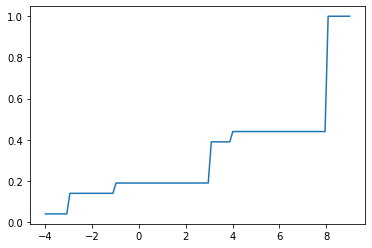

In [90]:
e = np.zeros((100))

for i in range(100):
    e[i] = E()

def func(x):
    ans = np.zeros_like(x)
    
    a = 1/5
    b = 0
    for i in range(len(ans)):
        if x[i] < -8:
            b = 0
        elif x[i] < -3:
            b = a * 1/5
        elif x[i] < -1:
            b = a * (1/5 + 1/2)
        elif x[i] < 3:
            b = a * (1/5 + 1/2 + 1/4) 
        elif x[i] < 4:
            b = a * (1/5 + 1/2 + 1/4 + 1)
        elif x[i] < 8:
            b = a * (1/5 + 1/2 + 1/4 + 1 + 1/4)
        else:
            b = 1
        ans[i] = b
        b = 0
    return ans
start_8 = int(e.min()) - 1
stop_8 = int(e.max()) + 1
    
x_8 = np.linspace(start = start_8, stop = stop_8, num = 100)
print(x_8)

plt.plot(x_8, func(x_8))